<a href="https://colab.research.google.com/github/Marita21/Marita21/blob/main/Modelos_de_Clasificacion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Modelos de Clasificación con SciKit-Learn

In [ ]:
import numpy as np
import pandas as pd
import matplotlib as mlt
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, recall_score, fbeta_score
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV

In [ ]:
from sklearn.metrics import f1_score

+ ## Descripción y Exploración del Dataset:

El dataset cuenta con las siguientes variables:
- ``age``: Edad.
- ``male``: Género.
- ``education``: 1 = Some High School; 2 = High School or GED; 3 = Some College or Vocational School; 4 = college
- ``currentSmoker``: Si la persona fuma o no
- ``cigsPerDay``: la cantidad de cigarrillos que la persona fuma por día en promedio.
- ``BPMeds``: si la persona consume medicación para la presión sanguínea.
- ``prevalentStroke``: Si la persona tuvo un infarto anteriormente.
- ``prevalentHyp``: si la persona tiene hipertensión.
- ``diabetes``: si la persona tuvo diabetes.
- ``totChol``: nivel de colesterol total.
- ``sysBP``: presión sanguínea sistólica.
- ``diaBP``: presión sanguínea diastólica.
- ``BMI``: índice de masa corporal.
- ``heartRate``: frecuencia cardíaca.
- ``glucose``: nivel de glucosa en sangre.
- ``TenYearCHD``: si la persona está en riesgo de tener una enfermedad coronaria dentro de los próximos 10 años.

Para obtener más información sobre las variables, buscar en https://www.kaggle.com/datasets/aasheesh200/framingham-heart-study-dataset

In [ ]:
from google.colab import files

In [ ]:
uploaded = files.upload()

Saving framingham.csv to framingham.csv


In [ ]:
# Importamos el dataset y hacemos un head()
df = pd.read_csv('framingham.csv')
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [ ]:
# Observamos la cantidad de nulos por feature
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   education        4135 non-null   float64
 3   currentSmoker    4240 non-null   int64  
 4   cigsPerDay       4211 non-null   float64
 5   BPMeds           4187 non-null   float64
 6   prevalentStroke  4240 non-null   int64  
 7   prevalentHyp     4240 non-null   int64  
 8   diabetes         4240 non-null   int64  
 9   totChol          4190 non-null   float64
 10  sysBP            4240 non-null   float64
 11  diaBP            4240 non-null   float64
 12  BMI              4221 non-null   float64
 13  heartRate        4239 non-null   float64
 14  glucose          3852 non-null   float64
 15  TenYearCHD       4240 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 530.1 KB


In [ ]:
# Calculamos el % de registros totales que contienen al menos un valor nulo
print('% de registros con al menos un valor nulo:     ', np.round(100 * df.isna().any(axis=1).sum() / df.shape[0], 1))

% de registros con al menos un valor nulo:      13.7


In [ ]:
# Aplicamos un describe() para ver estadísticos básicos
df.describe().T

,count,mean,std,min,25%,50%,75%,max
male,4240.0,0.429245,0.495027,0.00,0.00,0.0,1.00,1.0
age,4240.0,49.580189,8.572942,32.00,42.00,49.0,56.00,70.0
education,4135.0,1.979444,1.019791,1.00,1.00,2.0,3.00,4.0
currentSmoker,4240.0,0.494104,0.500024,0.00,0.00,0.0,1.00,1.0
cigsPerDay,4211.0,9.005937,11.922462,0.00,0.00,0.0,20.00,70.0
BPMeds,4187.0,0.029615,0.169544,0.00,0.00,0.0,0.00,1.0
prevalentStroke,4240.0,0.005896,0.076569,0.00,0.00,0.0,0.00,1.0
prevalentHyp,4240.0,0.310613,0.462799,0.00,0.00,0.0,1.00,1.0
diabetes,4240.0,0.025708,0.158280,0.00,0.00,0.0,0.00,1.0
totChol,4190.0,236.699523,44.591284,107.00,206.00,234.0,263.00,696.0


In [ ]:
# Calculamos las proporciones de cada clase en la variable Target
df['TenYearCHD'].value_counts(True)
# Se puede apreciar que estan claramente desbalanceadas

,proportion
TenYearCHD,
0,0.848113
1,0.151887


In [ ]:
# Aplicamos describe() previa aplicacion del metodo astype, con el objeto de tratar a las variables como objetos (strings)
df.astype(object).describe().T
# De esta manera podemos ver si dentro de las variables numericas hay algunas que sean mas bien discretas (y no continuas)

,count,unique,top,freq
male,4240.0,2.0,0.00,2420.0
age,4240.0,39.0,40.00,192.0
education,4135.0,4.0,1.00,1720.0
currentSmoker,4240.0,2.0,0.00,2145.0
cigsPerDay,4211.0,33.0,0.00,2145.0
BPMeds,4187.0,2.0,0.00,4063.0
prevalentStroke,4240.0,2.0,0.00,4215.0
prevalentHyp,4240.0,2.0,0.00,2923.0
diabetes,4240.0,2.0,0.00,4131.0
totChol,4190.0,248.0,240.00,85.0


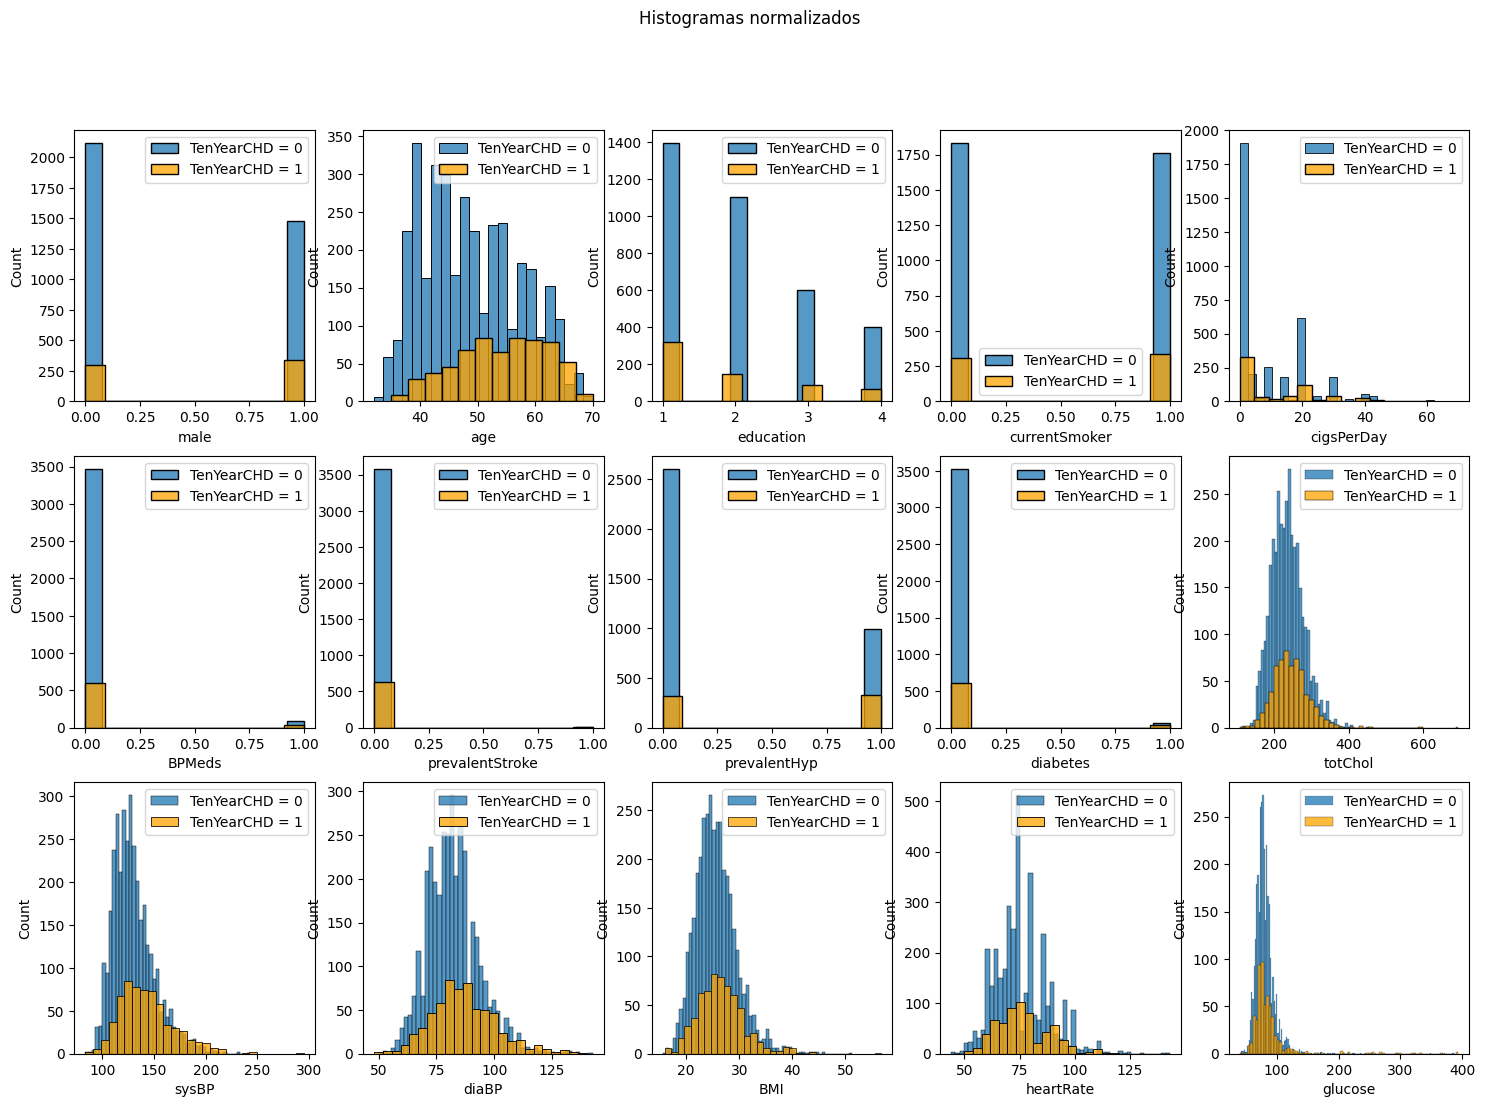

In [ ]:
# Creamos un grafico para cada feature discriminando por el valor del target con un loop
fig, axes = plt.subplots(nrows=3, ncols=5, figsize=(18,12))
fig.suptitle('Histogramas normalizados')
for c, ax in zip(df.columns[:-1], axes.flatten()):
    sns.histplot(data = df.loc[df['TenYearCHD']==0, c].dropna(), stat = 'count', ax = ax, kde = False )
    sns.histplot(data = df.loc[df['TenYearCHD']==1, c].dropna(), stat = 'count', kde=False, ax=ax, color = 'orange')
    ax.legend(['TenYearCHD = 0', 'TenYearCHD = 1'])
# Importante: el grafico utiliza el metodo "density" que permite comparar las clases desbalanceadas (ver que ocurre con otro metodos)

<Axes: >

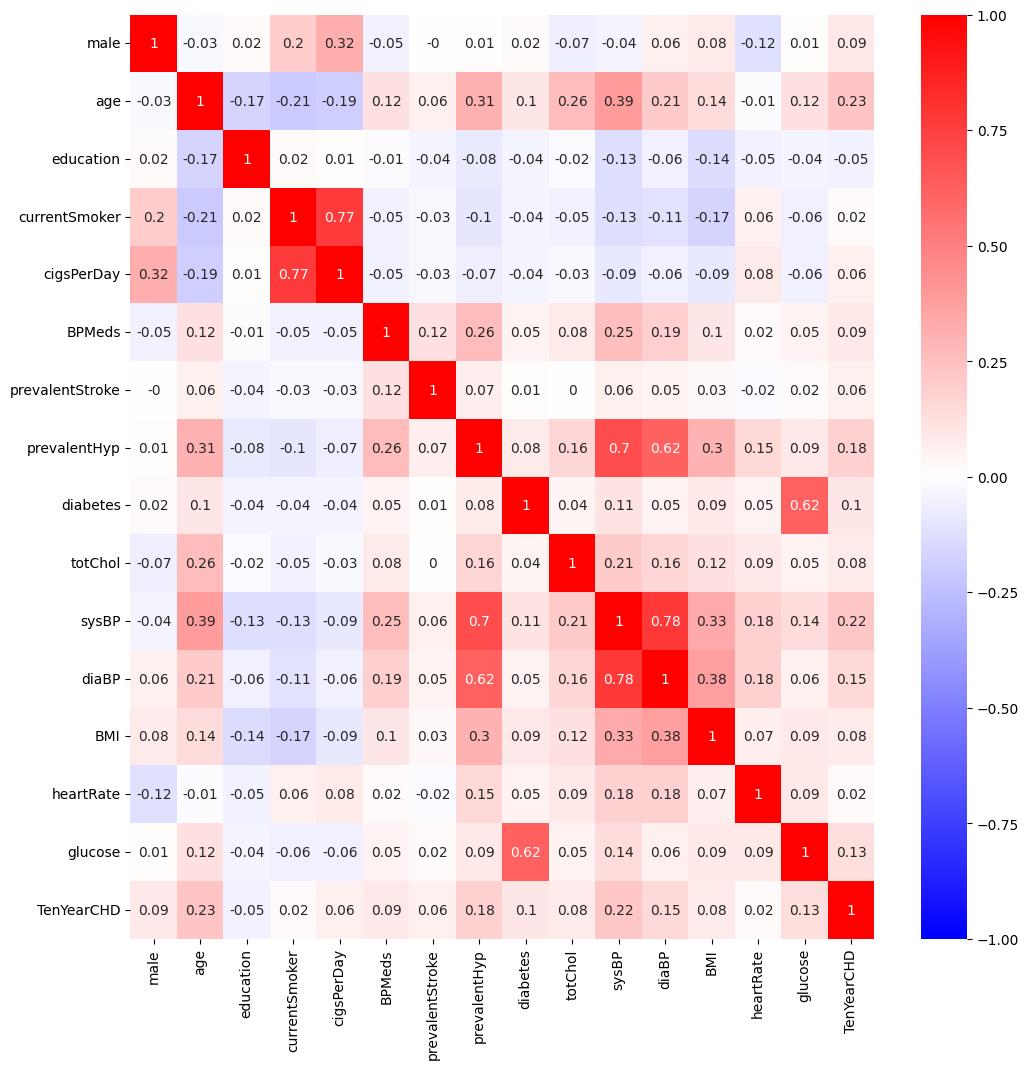

In [ ]:
# Graficamos en un mapa de calor los coeficientes de correlacion de todas las variables entre sí
plt.figure(figsize=(12,12))
sns.heatmap(df.corr().round(2), annot=True, vmin=-1, vmax=1, cmap='bwr')
# Pueden verse algunas variables correlacionadas:
# ['currentSmoker'] vs ['cisPerDay'], ['sysBP'] vs ['diaBP'], ['diabetes'] vs ['glucosa']

In [ ]:
# Eliminamos los registros con valores faltantes ya que son sólo un 13% del dataset
df.dropna(inplace=True)

# Preparamos la matriz de features y el vector objetivo
X = df.drop(columns=['TenYearCHD'])
y = df['TenYearCHD']

# Separamos un set de testeo para evaluar el modelo
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state = 0)

# Estandarizamos los datos para que la regularización sea correcta
scaler = StandardScaler()
X_train_std = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_std = scaler.transform(X_test)

# Ponemos el array resultado en dataframes:
X_train_std = pd.DataFrame(X_train_std, columns = X_train.columns)
X_test_std = pd.DataFrame(X_test_std, columns = X_train.columns)

In [ ]:
# Corroboramos que ambos datasets tienen la misma proporción de etiquetas
print(' Balance en el dataset de entrenamiento:  ')
print(pd.DataFrame(y_train).value_counts(normalize=True))

print('\n Balance en el dataset de testeo:')
print(pd.DataFrame(y_test).value_counts(normalize=True))

 Balance en el dataset de entrenamiento:  
TenYearCHD
0             0.847612
1             0.152388
Name: proportion, dtype: float64

 Balance en el dataset de testeo:
TenYearCHD
0             0.848087
1             0.151913
Name: proportion, dtype: float64


In [ ]:
# Aplicamos un .describe() a ambos para ver los resultados de la estandarizacion de variables
X_train.describe().T

,count,mean,std,min,25%,50%,75%,max
male,2743.0,0.442581,0.496783,0.00,0.00,0.00,1.000,1.0
age,2743.0,49.556690,8.542572,32.00,42.00,49.00,56.000,69.0
education,2743.0,1.977397,1.025673,1.00,1.00,2.00,3.000,4.0
currentSmoker,2743.0,0.492891,0.500041,0.00,0.00,0.00,1.000,1.0
cigsPerDay,2743.0,9.130879,12.065256,0.00,0.00,0.00,20.000,70.0
BPMeds,2743.0,0.030259,0.171330,0.00,0.00,0.00,0.000,1.0
prevalentStroke,2743.0,0.006198,0.078495,0.00,0.00,0.00,0.000,1.0
prevalentHyp,2743.0,0.318994,0.466172,0.00,0.00,0.00,1.000,1.0
diabetes,2743.0,0.025884,0.158818,0.00,0.00,0.00,0.000,1.0
totChol,2743.0,237.272694,44.273914,113.00,206.00,234.00,264.000,600.0


In [ ]:
X_train_std.describe().T

,count,mean,std,min,25%,50%,75%,max
male,2743.0,6.216925e-17,1.000182,-0.891057,-0.891057,-0.891057,1.122262,1.122262
age,2743.0,3.348073e-16,1.000182,-2.055574,-0.884753,-0.065178,0.754396,2.276464
education,2743.0,7.253079e-17,1.000182,-0.953106,-0.953106,0.022041,0.997189,1.972336
currentSmoker,2743.0,-4.533175e-18,1.000182,-0.985882,-0.985882,-0.985882,1.014321,1.014321
cigsPerDay,2743.0,2.590385e-17,1.000182,-0.756929,-0.756929,-0.756929,0.901026,5.045912
BPMeds,2743.0,4.792213e-17,1.000182,-0.176644,-0.176644,-0.176644,-0.176644,5.661112
prevalentStroke,2743.0,1.878029e-17,1.000182,-0.078970,-0.078970,-0.078970,-0.078970,12.663054
prevalentHyp,2743.0,-5.439809e-17,1.000182,-0.684409,-0.684409,-0.684409,1.461115,1.461115
diabetes,2743.0,-5.180771e-18,1.000182,-0.163009,-0.163009,-0.163009,-0.163009,6.134640
totChol,2743.0,2.201828e-16,1.000182,-2.807417,-0.706475,-0.073933,0.603791,8.194293


## 1. Modelo de Regresión Logística

In [ ]:
#Instanciamos el modelo de Regresion logistica y lo entrenamos. Almacenamos las predicciones
lr = LogisticRegression(penalty='l2', # Hiperparámetro de regularización
                        class_weight='balanced' # Hiperparámetro que modifica el peso de los datos para contemplar el desbalance de clases
                       )
lr.fit(X_train_std, y_train)

y_train_pred = lr.predict(X_train_std)

In [ ]:
# Función para generar un reporte general del clasificador + matriz de confusión:

def clf_report(model, X = X_train, y = y_train, y_pred = None):

  model_name = model.__class__.__name__
  if y_pred is None:
    y_pred = model.predict(X)

  sns.heatmap(confusion_matrix(y, y_pred), annot=True, cmap='PuBu', fmt='0.0f', linewidths=0.25,
             annot_kws={'size':13} )
  plt.xlabel('Predichos')
  plt.ylabel('Reales')

  print('Accuracy del modelo de ' + model_name + ' :   ', np.round(accuracy_score(y, y_pred), 3))
  print('Recall del modelo de ' + model_name + ' :     ', np.round(recall_score(y, y_pred), 3))

  print('Rporte del modelo de ' + model_name + ' :   \n', classification_report(y, y_pred))

Accuracy del modelo de LogisticRegression :    0.671
Recall del modelo de LogisticRegression :      0.67
Rporte del modelo de LogisticRegression :   
               precision    recall  f1-score   support

           0       0.92      0.67      0.78      2325
           1       0.27      0.67      0.38       418

    accuracy                           0.67      2743
   macro avg       0.59      0.67      0.58      2743
weighted avg       0.82      0.67      0.72      2743



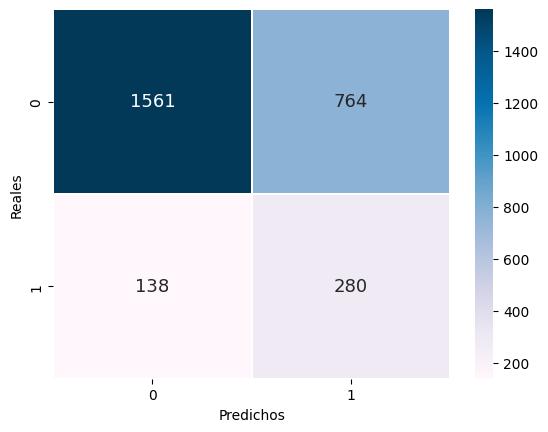

In [ ]:
# Imprimimos resumen de metricas y la matriz de confusion

clf_report(lr, X = X_train_std)

#### Observar el valor particularmente bajo para la presición de la clase 1

+ ### Cambio en las métricas en función del umbral elegido

In [ ]:
# Realizamos predicciones con un umbral distinto al que se establece por defecto (0.5)
umbral = 0.7 # Elegimos el umbral
probs = lr.predict_proba(X_train_std)[:,1] # Calculamos las probabilidades con el método .predict_proba
y_pred_train_umbral = probs > umbral # Calculamos las predicciones

Accuracy del modelo de LogisticRegression :    0.82
Recall del modelo de LogisticRegression :      0.297
Rporte del modelo de LogisticRegression :   
               precision    recall  f1-score   support

           0       0.88      0.91      0.90      2325
           1       0.38      0.30      0.33       418

    accuracy                           0.82      2743
   macro avg       0.63      0.61      0.62      2743
weighted avg       0.80      0.82      0.81      2743



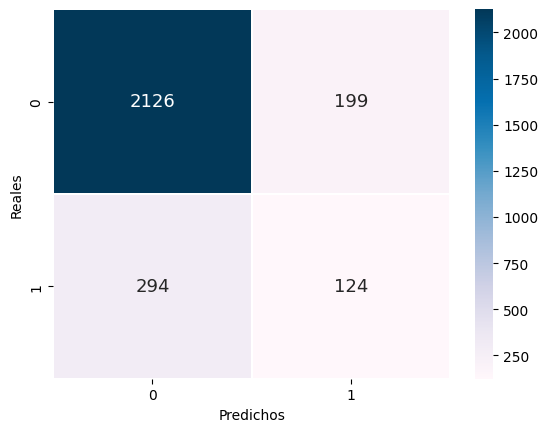

In [ ]:
# Imprimimos resumen de metricas y la matriz de confusion
clf_report(lr, X = X_train_std, y_pred = y_pred_train_umbral)

#### Podemos observar una mejora en el valor de presición para la clase 1, pero a costa de perder recall para la misma clase y presición de la clase 0 (aunque esto último en menor medida)
#### ¿Qué ocurre si utilizamos un umbral menor a 0.5?

+ ### ¿Cómo se comporta el modelo en testeo?

In [ ]:
# Y ahora hacemos predicciones en testeo con el umbral elegido
probs = lr.predict_proba(X_test_std)[:,1]
y_pred_test_umbral = probs > umbral

Accuracy del modelo de LogisticRegression :    0.823
Recall del modelo de LogisticRegression :      0.281
Rporte del modelo de LogisticRegression :   
               precision    recall  f1-score   support

           0       0.88      0.92      0.90       776
           1       0.39      0.28      0.33       139

    accuracy                           0.82       915
   macro avg       0.63      0.60      0.61       915
weighted avg       0.80      0.82      0.81       915



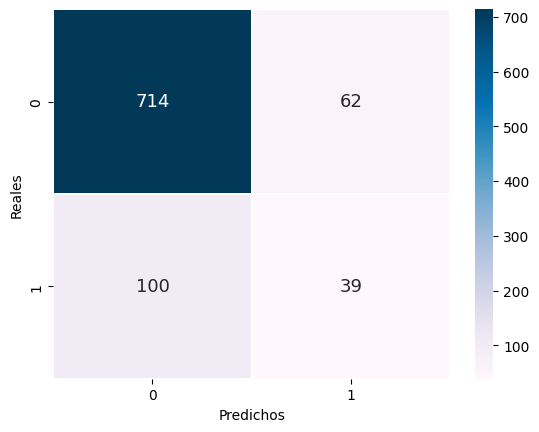

In [ ]:
# Imprimimos resumen de metricas y la matriz de confusión
clf_report(lr, X = X_test_std, y = y_test, y_pred = y_pred_test_umbral)

## 2. Modelo de Naive Bayes

In [ ]:
# Instanciamos el modelo de Naive Bayes y lo entrenamos. Almacenamos las predicciones
gnb = GaussianNB()

gnb.fit(X_train, y_train)

y_train_pred_gnb = gnb.predict(X_train)

Accuracy del modelo de GaussianNB :    0.82
Recall del modelo de GaussianNB :      0.213
Rporte del modelo de GaussianNB :   
               precision    recall  f1-score   support

           0       0.87      0.93      0.90      2325
           1       0.35      0.21      0.27       418

    accuracy                           0.82      2743
   macro avg       0.61      0.57      0.58      2743
weighted avg       0.79      0.82      0.80      2743



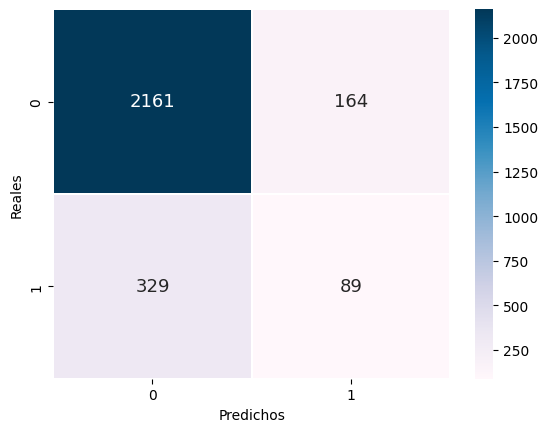

In [ ]:
# Imprimimos resumen de metricas y la matriz de confusión
clf_report(gnb)

##### Para entender un poco mejor como funciona el umbral de desición del modelo, vamos a graficar el histograma de la clase 1 y la clase 0, en función de la probabilidad que el modelo predice para cada clase:


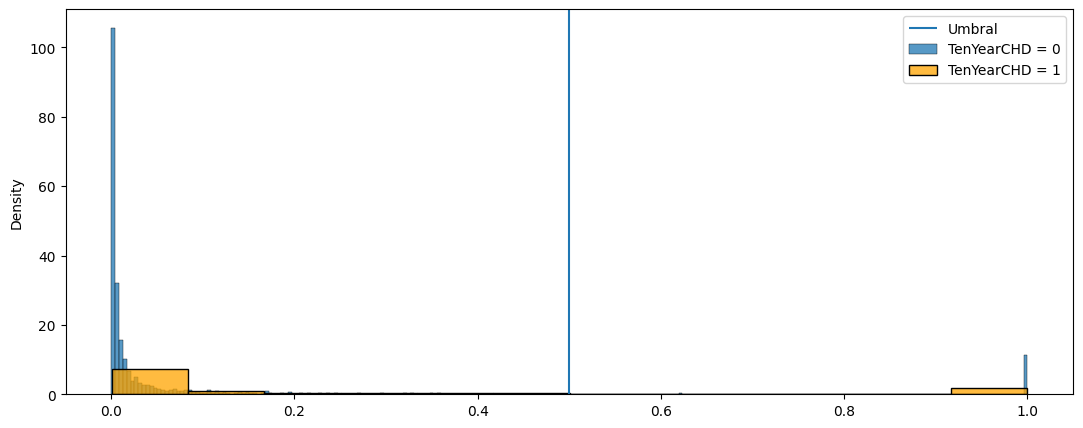

In [ ]:
# Histograma de probabilidades
fig, ax01 = plt.subplots(1,1 , figsize=(13,5))
sns.histplot(data = gnb.predict_proba(X_train[y_train==0])[:,1], stat = 'density', ax=ax01)
sns.histplot(data = gnb.predict_proba(X_train[y_train==1])[:,1], stat = 'density', color = 'orange', ax=ax01)
ylim = plt.ylim()
plt.vlines(0.5, ylim[0], ylim[1])
plt.ylim(ylim)
plt.legend(['Umbral', 'TenYearCHD = 0', 'TenYearCHD = 1'])

 ##### El modelo produce una mejor separación mientras mas separados se encuentren los histogramas de cada clase. En el caso de que las clases esten separadas pero para un valor distinto del umbral por defecto (0.5) solo basta con modificar el umbral de desición para mejorar la performance del modelo

+ ### Comportamiento en entrenamiento para un umbral distinto de 0.5

In [ ]:
# Realizamos predicciones con un umbral distinto al que se establece por defecto (0.5)
umbral = 0.035 # Elegimos el umbral (en este caso ayudándonos con el gráfico de histogramas de arriba)
probs = gnb.predict_proba(X_train)[:,1] # Calculamos las probabilidades con el método .predict_proba
y_pred_train_gnb_umbral = probs > umbral # Calculamos las predicciones


Accuracy del modelo de GaussianNB :    0.728
Recall del modelo de GaussianNB :      0.514
Rporte del modelo de GaussianNB :   
               precision    recall  f1-score   support

           0       0.90      0.77      0.83      2325
           1       0.28      0.51      0.37       418

    accuracy                           0.73      2743
   macro avg       0.59      0.64      0.60      2743
weighted avg       0.80      0.73      0.76      2743



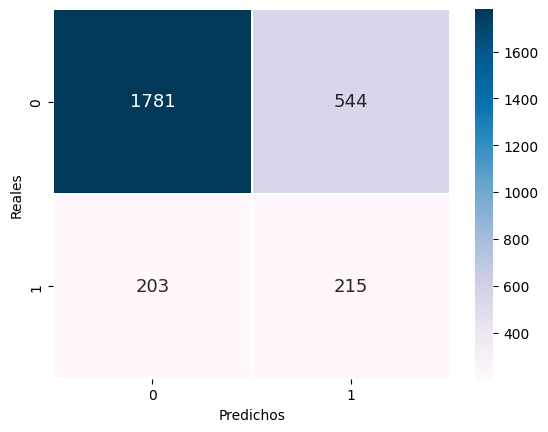

In [ ]:
# Imprimimos resumen de metricas y la matriz de confusión
clf_report(gnb, y_pred = y_pred_train_gnb_umbral)

+ ### Comportamiento en testeo para el umbral elegido

In [ ]:
# Y ahora hacemos predicciones en testeo con el umbral elegido
probs = gnb.predict_proba(X_test)[:,1]
y_pred_test_gnb_umbral = probs > umbral

Accuracy del modelo de GaussianNB :    0.753
Recall del modelo de GaussianNB :      0.504
Rporte del modelo de GaussianNB :   
               precision    recall  f1-score   support

           0       0.90      0.80      0.85       776
           1       0.31      0.50      0.38       139

    accuracy                           0.75       915
   macro avg       0.60      0.65      0.61       915
weighted avg       0.81      0.75      0.78       915



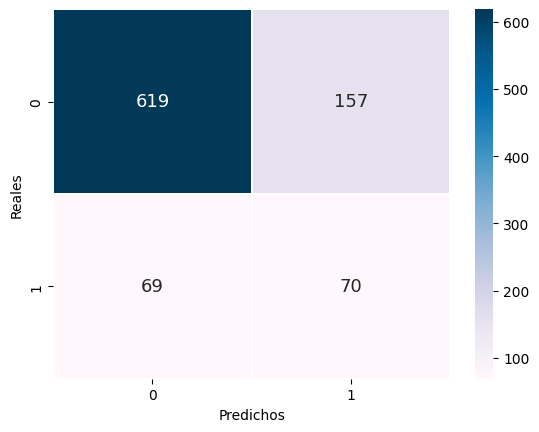

In [ ]:
# Imprimimos resumen de metricas y la matriz de confusión
clf_report(gnb, X = X_test, y = y_test, y_pred = y_pred_test_gnb_umbral)

## 3. Modelo de AdaBoost

In [ ]:
#Instanciamos el modelo base (un árbol de desición en este caso) y el modelo de ensamble (AdaBoost). Lo entrenamos y almacenamos las predicciones.

# Modelo base
dtc = DecisionTreeClassifier(max_depth = 2,
                             min_samples_split = 6)

# AdaBoost (Ensamble)
ada = AdaBoostClassifier(estimator = dtc,
                         n_estimators = 650, #80
                         learning_rate = 0.7)

In [ ]:
ada.fit(X_train, y_train) # Entrenamiento

y_train_pred_ada = ada.predict(X_train) # Predicción

Accuracy del modelo de AdaBoostClassifier :    0.865
Recall del modelo de AdaBoostClassifier :      0.165
Rporte del modelo de AdaBoostClassifier :   
               precision    recall  f1-score   support

           0       0.87      0.99      0.93      2325
           1       0.77      0.17      0.27       418

    accuracy                           0.87      2743
   macro avg       0.82      0.58      0.60      2743
weighted avg       0.85      0.87      0.83      2743



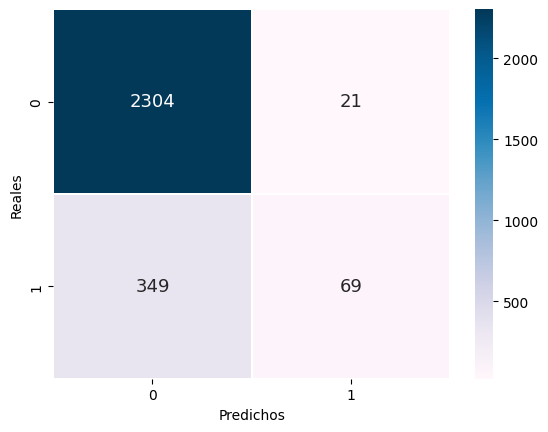

In [ ]:
# Imprimimos resumen de metricas y la matriz de confusión
clf_report(ada)

##### ¿Qué ocurrión con el modelo?, ¿por qué las métricas son perfectas?

Accuracy del modelo de GaussianNB :    0.83
Recall del modelo de GaussianNB :      0.223
Rporte del modelo de GaussianNB :   
               precision    recall  f1-score   support

           0       0.87      0.94      0.90       776
           1       0.39      0.22      0.28       139

    accuracy                           0.83       915
   macro avg       0.63      0.58      0.59       915
weighted avg       0.80      0.83      0.81       915



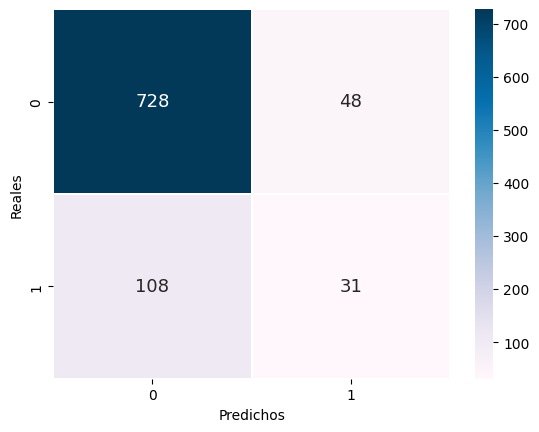

In [ ]:
# Imprimimos resumen de metricas y la matriz de confusión para el dataset de teste
clf_report(gnb, X = X_test, y = y_test)

##### Podemos ver claramente que el modelo no performa igualmente bien en testeo. Ésto es un claro síntoma de overfitting!

##### Grafiquemos los histogramas en función de la probabilidad predicha para el set de entrenamiento

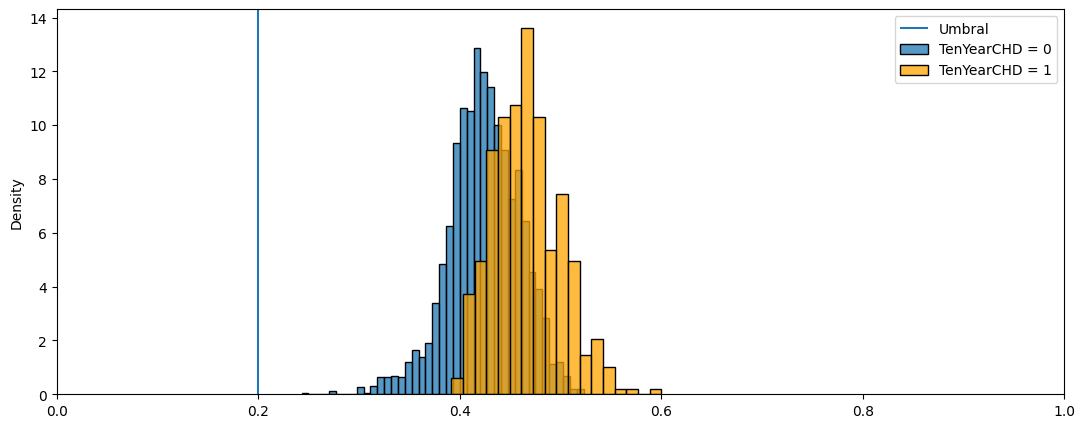

In [ ]:
# Histograma de probabilidades
fig, ax01 = plt.subplots(1,1 , figsize=(13,5))
sns.histplot(data = ada.predict_proba(X_train[y_train==0])[:,1], stat = 'density', ax=ax01)
sns.histplot(data = ada.predict_proba(X_train[y_train==1])[:,1], stat = 'density', color = 'orange', ax=ax01)
ylim = plt.ylim()
plt.vlines(0.2, ylim[0], ylim[1])
plt.ylim(ylim)
plt.xlim(0, 1)
plt.legend(['Umbral', 'TenYearCHD = 0', 'TenYearCHD = 1'])

##### Podemos ver que los histogramas están perfectamente separados (el modelo hizo una clasificación perfecta para el data set de entrenamiento). Resultado que es muy diferente para el dataset de testeo.

## 4.Optimización de hiperparámetros

In [ ]:
# Al igual que antes, instanciamos el modelo que se quiera optimizar en sus hiperparámetros con GridSearch
# En ésta instancia SOLO deben ingresarse hiperparámetros que NO SERAN optimizados, y con un valor distinto al que se asigna por defecto (de lo contrario no tendrá diferencia)
dtc = DecisionTreeClassifier()

#lrc = LogisticRegression(penalty='l2', C=1.0, class_weight='balanced', solver='saga', tol=0.001, max_iter=1500)

ada = AdaBoostClassifier(estimator = dtc)

In [ ]:
# Instanciamos la grilla de hiperparámetros
param_grid = {'estimator__max_depth': [2, 3, 5],
              'estimator__min_samples_split': [6, 24, 96],
              'estimator__max_features': [None, 10, 6],
              'estimator__class_weight': [None, 'balanced'],
              'estimator__splitter': ["best", "random"],
              'n_estimators': [10, 30, 100],
              'learning_rate': [0.3, 0.5, 0.7]
             }
# Notar que para modelos de ensamble, tanto los hiperparámetros del modelo base como los del ensamble en sí mismo pueden ser ingresados en esta grilla

In [ ]:
# Instanciamos un objeto GridSearch, al cual ingresamos el modelo objeto, el scoring a mazimizar, y el valor cv (cross validation folds)
#scorer = make_scorer(fbeta_score, beta=4)

grid_obj = GridSearchCV(ada, param_grid, scoring = 'recall', n_jobs=-1, verbose=1, cv=3)
# Para indagar mas sobre los parámetros disponibles de esta funcion, citar la documentación

In [ ]:
# Entrenamos el objeto gridsearch
grid_fit = grid_obj.fit(X_train, y_train)
# Notar la diferencia de tiempo de entrenamiento respecto a los modelos anteriores

Fitting 3 folds for each of 972 candidates, totalling 2916 fits


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
44 fits failed out of a total of 2916.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
44 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_weight_boosting.py", line 167, in fit
    sample_weight, est

In [ ]:
# Imprimimos un resumen del estimador optimizado y lo instanciamos en un nuevo objeto
best_ada = grid_fit.best_estimator_ # Instancia del mejor modelo
print(grid_fit.best_params_) # Hiperparámetros del mejor modelo entrenado por gridsearch
print(grid_fit.best_score_)# Score del mejor modelo entrenado por gridsearch
y_train_pred_ada_opt = best_ada.predict(X_train) # Predicción en entrenamiento
y_test_pred_ada_opt = best_ada.predict(X_test) # Predicción en testeo

{'estimator__class_weight': 'balanced', 'estimator__max_depth': 2, 'estimator__max_features': 10, 'estimator__min_samples_split': 6, 'estimator__splitter': 'best', 'learning_rate': 0.5, 'n_estimators': 30}
0.7106543336759165


Accuracy del modelo de AdaBoostClassifier :    0.744
Recall del modelo de AdaBoostClassifier :      0.464
Rporte del modelo de AdaBoostClassifier :   
               precision    recall  f1-score   support

           0       0.89      0.79      0.84      2325
           1       0.29      0.46      0.36       418

    accuracy                           0.74      2743
   macro avg       0.59      0.63      0.60      2743
weighted avg       0.80      0.74      0.77      2743



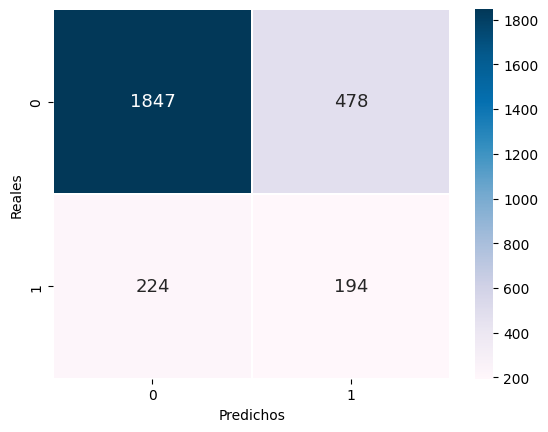

In [ ]:
# Imprimimos resumen de metricas y la matriz de confusión para el dataset de teste
clf_report(best_ada)

Accuracy del modelo de AdaBoostClassifier :    0.763
Recall del modelo de AdaBoostClassifier :      0.453
Rporte del modelo de AdaBoostClassifier :   
               precision    recall  f1-score   support

           0       0.89      0.82      0.85       776
           1       0.31      0.45      0.37       139

    accuracy                           0.76       915
   macro avg       0.60      0.64      0.61       915
weighted avg       0.80      0.76      0.78       915



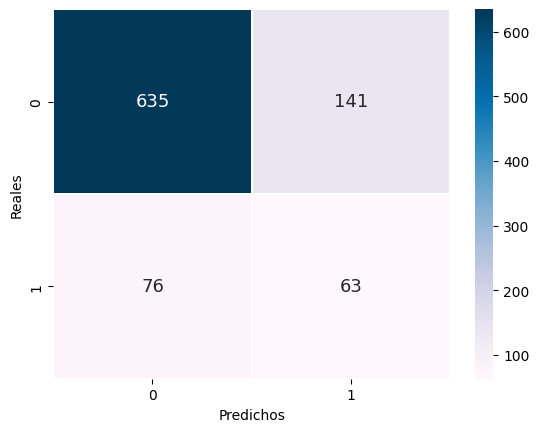

In [ ]:
# Imprimimos resumen de metricas y la matriz de confusión para el dataset de teste
clf_report(best_ada, X = X_test, y = y_test)